# APRAU ASSIGNMENT - Part 1
### 1050497 - Jorge Martins <p> 1050532 - Patrícia Vicente

# Introduction

Machine learning is now essential for analyzing complex data and finding meaningful insights. This assignment focuses on using machine learning to explore and understand a dataset with environmental and geographical features. Each data point represents a piece of land with attributes that affect its Vegetation Type. By applying machine learning algorithms, we aim to uncover patterns and relationships that help us understand what influences vegetation distribution. This analysis not only shows the practical use of machine learning but also adds to environmental science by providing insights into ecological dynamics.

# Importing Libraries

In this section, we load all the libraries that will be needed to perfome all the analysis.
-  NumPy: used for working with arrays, linear algebra and matrices.
-  Pandas: used for analyzing, cleaning, exploring, and manipulating data.
-  Matplotlib: used for for creating static, animated, and interactive visualizations.
-  Sklearn: used for classification, regression, clustering and dimensionality reduction.
-  Seaborn: used for for drawing attractive and informative statistical graphics.

In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import classification_report

from IPython.display import display, HTML

from pygam import LogisticGAM, s, f
from pygam.datasets import default
from sklearn.preprocessing import LabelBinarizer

# Reading Datasets and Descriptive Statistics

The code below is essentially preparing and exploring the dataset, providing an overview of its structure and contents, and setting up a consistent style for any visualizations you might create later.

1. Configuring Matplotlib's default settings to ensure that plots look consistent and visually appealing using `plt.rcParams`.
2. Read the csv files containing the datasets needed for the analysis.
3. Concatenate the three datasets int one and show the information of the datasets with `df.head()`, `df.shape()` and `df.describe()`.
4. Create a new dataframe to check the data types and missing values.

In [27]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

data_3 = pd.read_csv('Data_Class_3.csv')
data_5 = pd.read_csv('Data_Class_5.csv')
data_6 = pd.read_csv('Data_Class_6.csv')

df = pd.concat([data_3, data_5, data_6], ignore_index=True)

df.head(20)
df.shape
df.describe()

# show the first 10 lines od the dataset
print(df.head(10))

# Information about dataset dimension
print(df.shape)

# Descriptive statistics of the numerical columns
print(df.describe())

# Checking data types and potential missing values (NaN)
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

print(df_info)

# Set the style for the visualizations
sns.set_theme(style="whitegrid")

      Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0   6828      2499                 55     22                           390   
1   1891      2092                262     17                           309   
2  14113      2837                106     20                           638   
3   4725      2298                308     37                           127   
4  14903      2604                104     30                            30   
5  13003      2319                317     23                           201   
6  11031      2506                180     21                            60   
7   7464      2698                225      7                           228   
8   8185      2751                 52     11                           108   
9   3852      2156                185     13                           330   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                         136                              816   
1        

# Univariate Analysis

## Numerical Variables
In this section, we will visualize the distribution of the numerical variables of the dataset:
- Altitude
- Slope_Orientation
- Slope
- Horizontal_Distance_to_Roadways
- Horizontal_Distance_to_Water
- Vertical_Distance_to_Water
- Shadow_Index (9h, 12h, 15h)
- Horizontal_Distance_to_Fire_Points
- Canopy_Density
- Wind_Exposure_Level
- Rainfall_Summer
- Rainfall_Winter

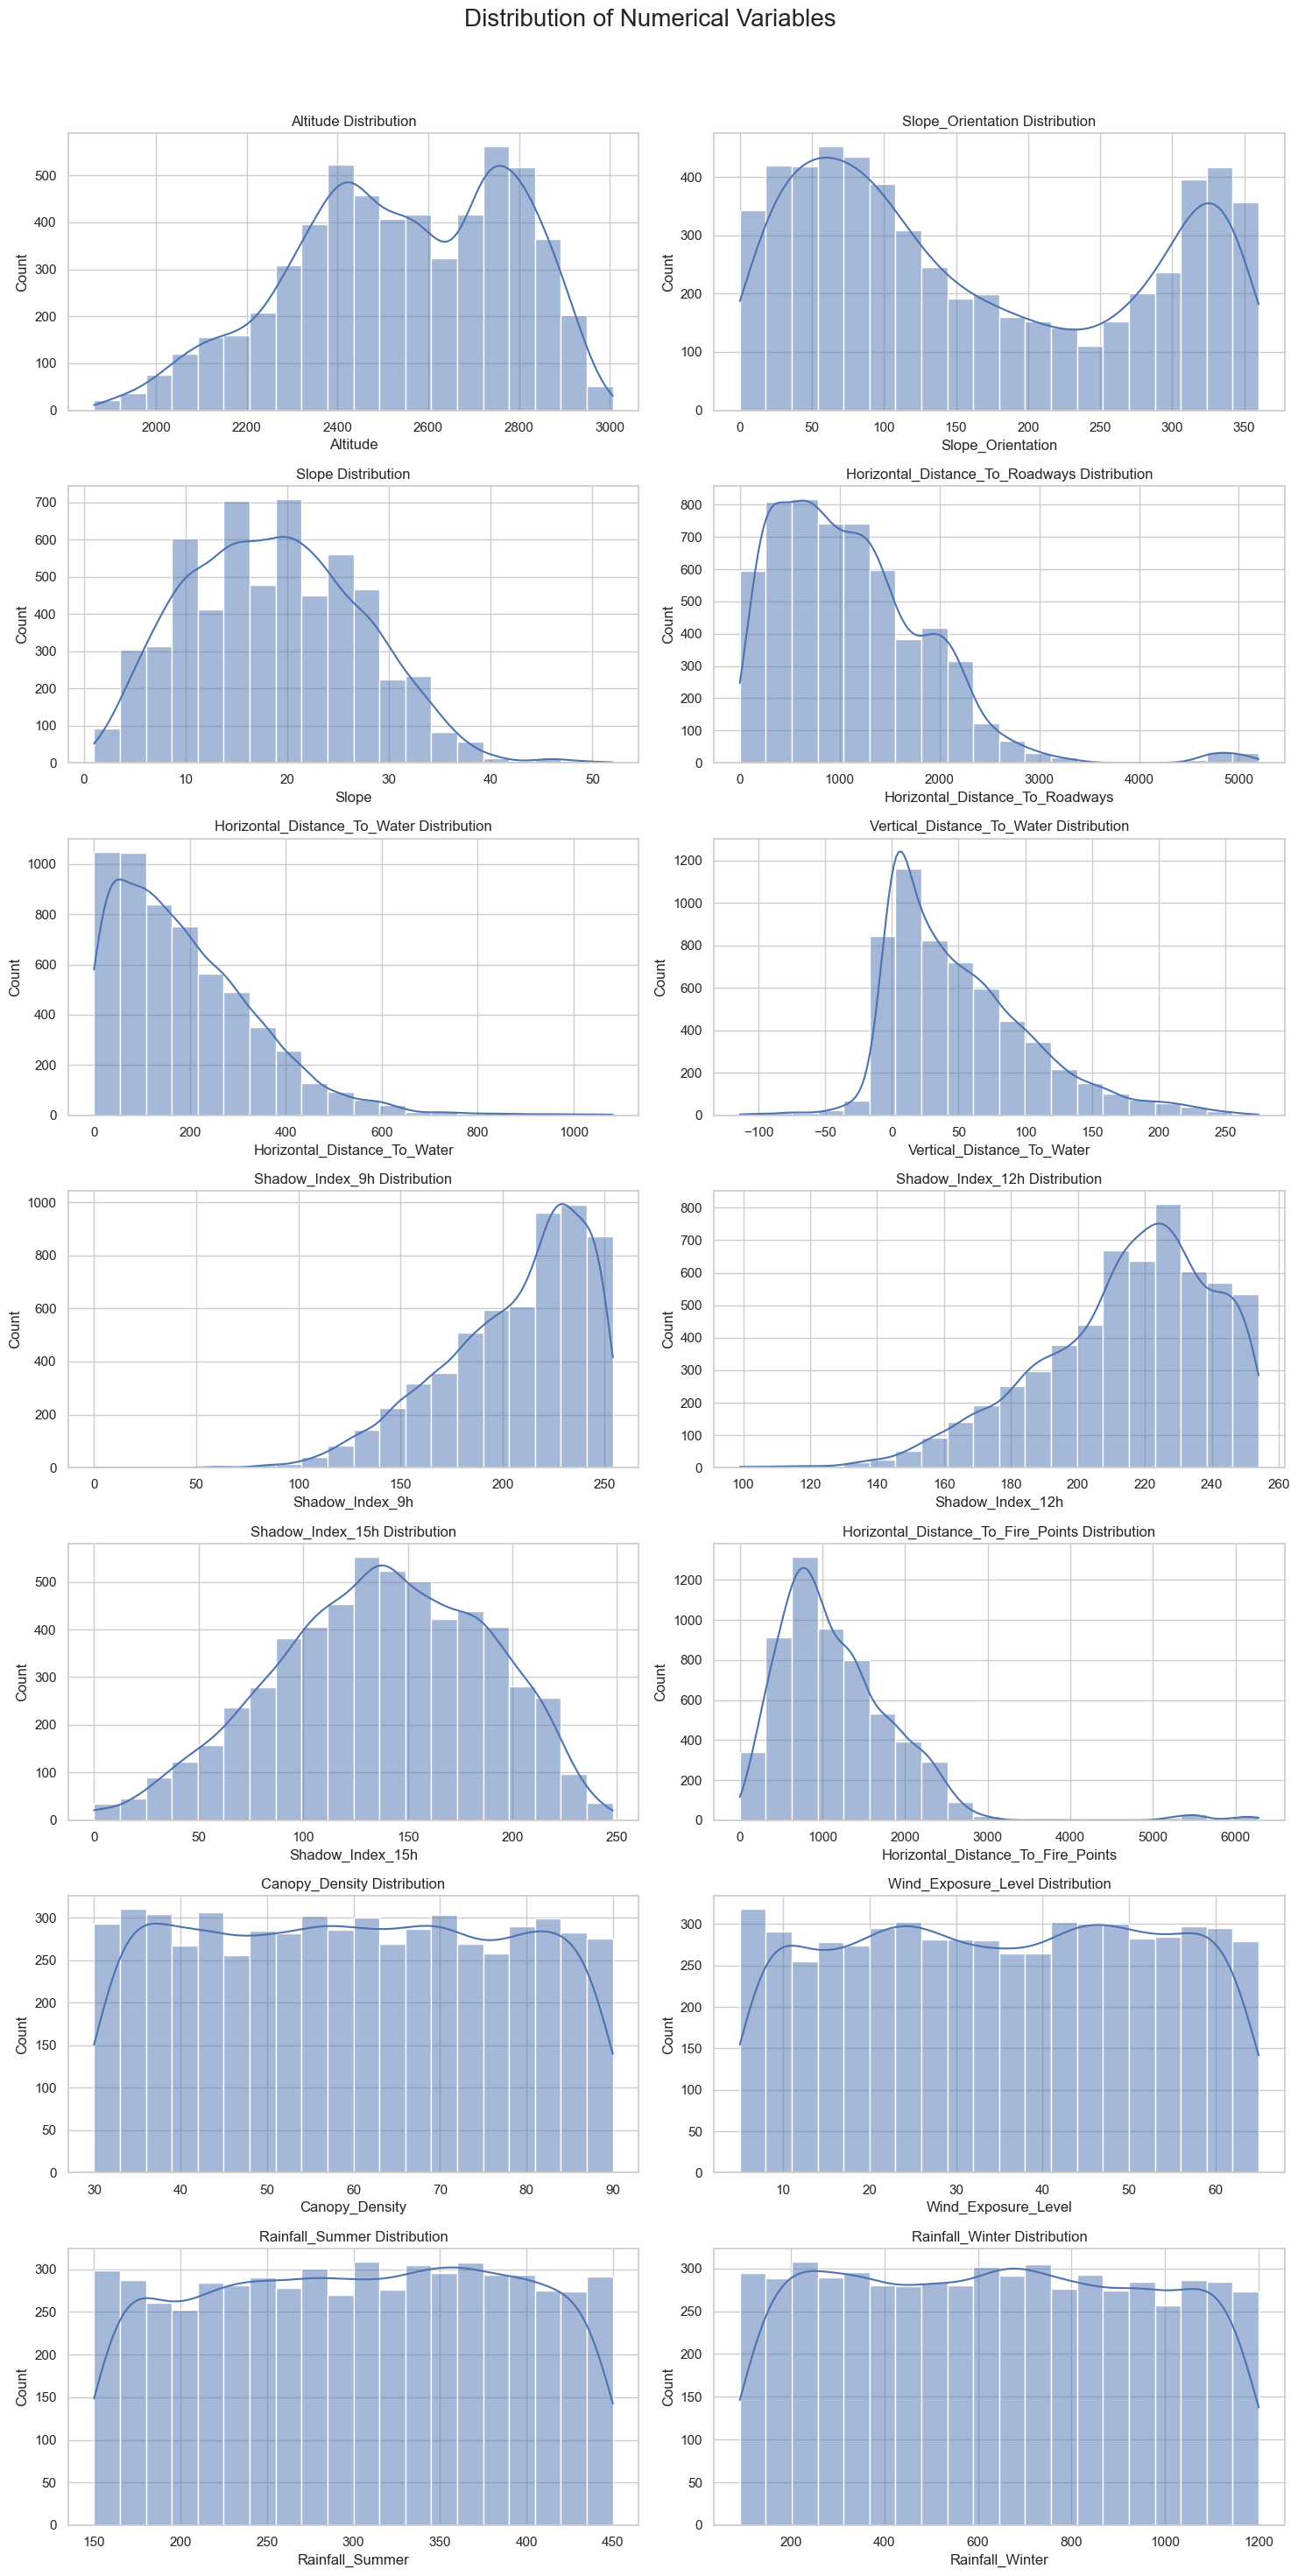

In [28]:
# Plot histograms for numerical variables
fig, axes = plt.subplots(7, 2, figsize=(15, 30))
fig.suptitle('Distribution of Numerical Variables')

sns.histplot(df['Altitude'], kde=True, bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Altitude Distribution')

sns.histplot(df['Slope_Orientation'], kde=True, bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Slope_Orientation Distribution')

sns.histplot(df['Slope'], kde=True, bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Slope Distribution')

sns.histplot(df['Horizontal_Distance_To_Roadways'], kde=True, bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Horizontal_Distance_To_Roadways Distribution')

sns.histplot(df['Horizontal_Distance_To_Water'], kde=True, bins=20, ax=axes[2, 0])
axes[2, 0].set_title('Horizontal_Distance_To_Water Distribution')

sns.histplot(df['Vertical_Distance_To_Water'], kde=True, bins=20, ax=axes[2, 1])
axes[2, 1].set_title('Vertical_Distance_To_Water Distribution')

sns.histplot(df['Shadow_Index_9h'], kde=True, bins=20, ax=axes[3, 0])
axes[3, 0].set_title('Shadow_Index_9h Distribution')

sns.histplot(df['Shadow_Index_12h'], kde=True, bins=20, ax=axes[3, 1])
axes[3, 1].set_title('Shadow_Index_12h Distribution')

sns.histplot(df['Shadow_Index_15h'], kde=True, bins=20, ax=axes[4, 0])
axes[4, 0].set_title('Shadow_Index_15h Distribution')

sns.histplot(df['Horizontal_Distance_To_Fire_Points'], kde=True, bins=20, ax=axes[4, 1])
axes[4, 1].set_title('Horizontal_Distance_To_Fire_Points Distribution')

sns.histplot(df['Canopy_Density'], kde=True, bins=20, ax=axes[5, 0])
axes[5, 0].set_title('Canopy_Density Distribution')

sns.histplot(df['Wind_Exposure_Level'], kde=True, bins=20, ax=axes[5, 1])
axes[5, 1].set_title('Wind_Exposure_Level Distribution')

sns.histplot(df['Rainfall_Summer'], kde=True, bins=20, ax=axes[6, 0])
axes[6, 0].set_title('Rainfall_Summer Distribution')

sns.histplot(df['Rainfall_Winter'], kde=True, bins=20, ax=axes[6, 1])
axes[6, 1].set_title('Rainfall_Winter Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The histograms above help understand the spread and tendency of each variable, as well as identify any potential outliers or unusual patterns in the data. Each histogram show the distribution of a specific variable, with a Kernel Density Estimate (KDE) overlay to give a smooth approximation of the distribution. 

Detailing the histogram results
- <b>Altitude</b>
    - The histogram bars and the KDE curve shows two peaks. This means that the common altitude is around 2400 and 2800 meters, which suggests that the altitude data may come from two different geographic or environmental zones, each with its own common altitude range.

- <b>Slope_Orientation</b>
    - According to the histogram the most common slope orientations are 40° to 100° and 300° to 350°, the two peaks. This type of distribution is important since slope orientation affect things like vegetation growth or even solar exposure.

- <b>Slope</b>
    - The x-axis represents the slope of the terrain: 0° is a flat land and 50° is the maximum slope. We can see that the majority of the lands has slopes around 10° and 25°, and the peak approximately at 20°.
    - According to the histogram, after 30° values are less frequent which suggests that there will be less land with the highest slope values.

- <b>Horizontal_Distance_to_Roadways</b>
    - The closer the distance to the roadway, the greater the human activity that influences the environment. Since the peak is around 250 and 500 meters, this means that the majority of the terrains are closer to the roadway.

- <b>Horizontal_distance_to_water</b>
    - The peak is around 0 and 100 meters, which suggest that the majority of the terrains are closer to water source.

- <b>Vertical_distance_to_water</b>
	- According to the histogram most of the terrains are near or slightly above the water level. The negative values indicate that the location of the terrain is below the water level (like valleys or some kind of depressions)
	- This is an important attribue in determining Vegetation_Type.

- <b>Shadow_Index_9h</b>
	- Most of the terrain samples have a shadow index between 150 and 250, with a peak between 200 and 250. This suggests that most of the terrain has moderate to high shadowing at 9 a.m.

- <b>Shadow_Index_12h</b>
	- Most of the terrain samples have a shadow index between 200 and 260, with a peak between 220 and 240. This suggests that most of the terrain has moderate to high shadowing at 12 a.m.

- <b>Shadow_Index_15h</b>
	- Most of the terrain samples have a shadow index between 100 and 200, with a peak between 120 and 150. This suggests that most of the terrain has moderate to high shadowing at 15 a.m.
	
- <b>Horizontal_distance_to_fire_points</b>
	- The peak is around 1000 meters, which means that this is the distance of the terrain to a possible fire point.
	- At long distances we can see through the histogram the presence of outliers.

The remainder histograms, Canopy_Density, Wind_exposure, Rainfall_Summer and Rainfall_Winter shows a relatively even distribution, suggesting that the distribution are spread out across the dataset without any major clustering.

In conclusion, understanding this distribution offers insights into how all of these mentioned features could affect the vegetation types.This exploration of terrain features, aligns with the task of using environmental data to understand how these features correlate with different vegetation types.

## Categorical Variables
In this section we will analyze the categorical variables of the dataset:
- Soil_Type
- Wilderness_Area
- Vegetation_Type (our target variable)

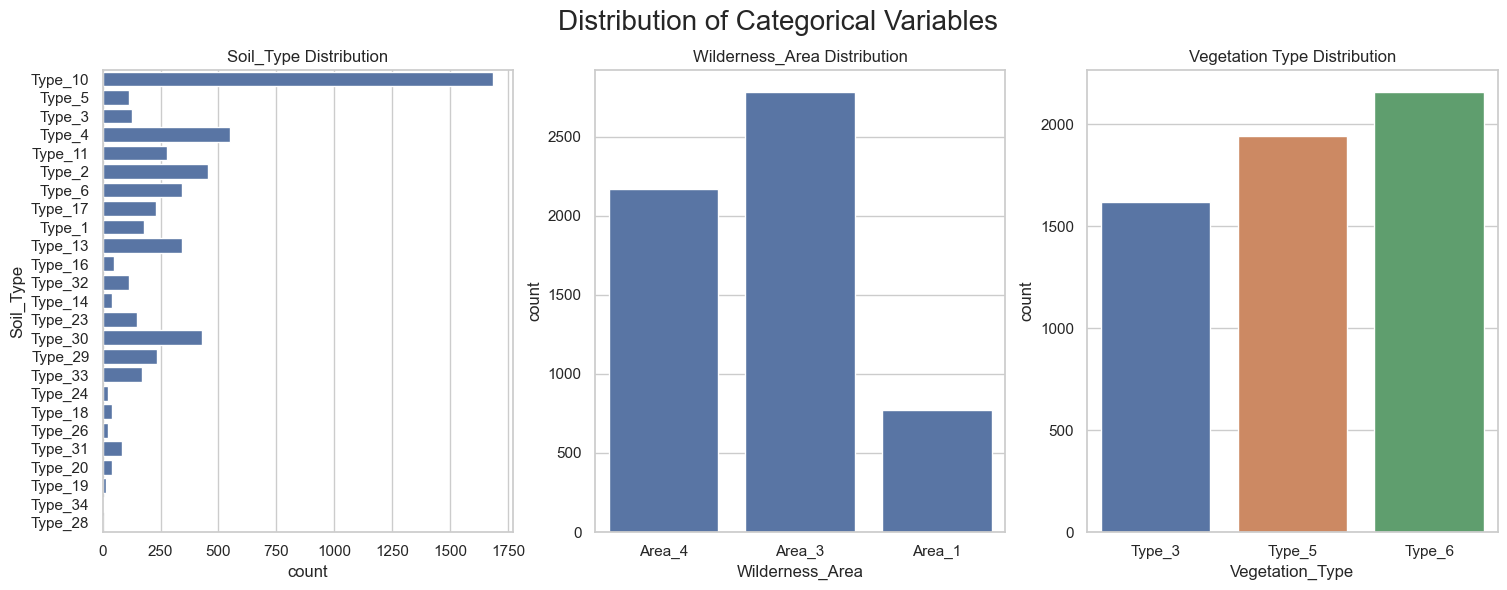

<Figure size 800x500 with 0 Axes>

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Categorical Variables')

sns.countplot(y='Soil_Type', data=df, ax=axes[0])
axes[0].set_title('Soil_Type Distribution')

sns.countplot(x='Wilderness_Area', data=df, ax=axes[1])
axes[1].set_title('Wilderness_Area Distribution')

sns.countplot(x='Vegetation_Type', hue='Vegetation_Type',data=df, ax=axes[2])
axes[2].set_title('Vegetation Type Distribution')
plt.show()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

To analyze this variables we used bar plots, a graphical representation used to display and comparing categorical data, providing clear insights into how categories compare to one another in terms of frequency, size, or count.

Detailing the bar plots above
- <b>Soil_Type</b>
    - Throughout the analysis of the bar plot we can observe that there are 40 type of soil and the dominant soil is type_10.

- <b>Wilderness_Area</b>
    - The analysis of the bar plot shows that Area_3 is the most dominant Wilderness_Area, followed by Area_4.
    
- <b>Vegetation_Type</b>
    - Although the frequency as some proximity, it is clear that Type_6 is the dominant vegetation_type.

# Correlation Matrix
A correlation matrix is a table that displays the correlation coefficients between multiple variables in a dataset. Each cell in the matrix shows the correlation between two variables, which quantifies the strength and direction of their relationship. This helps to detect patterns and dependencies.

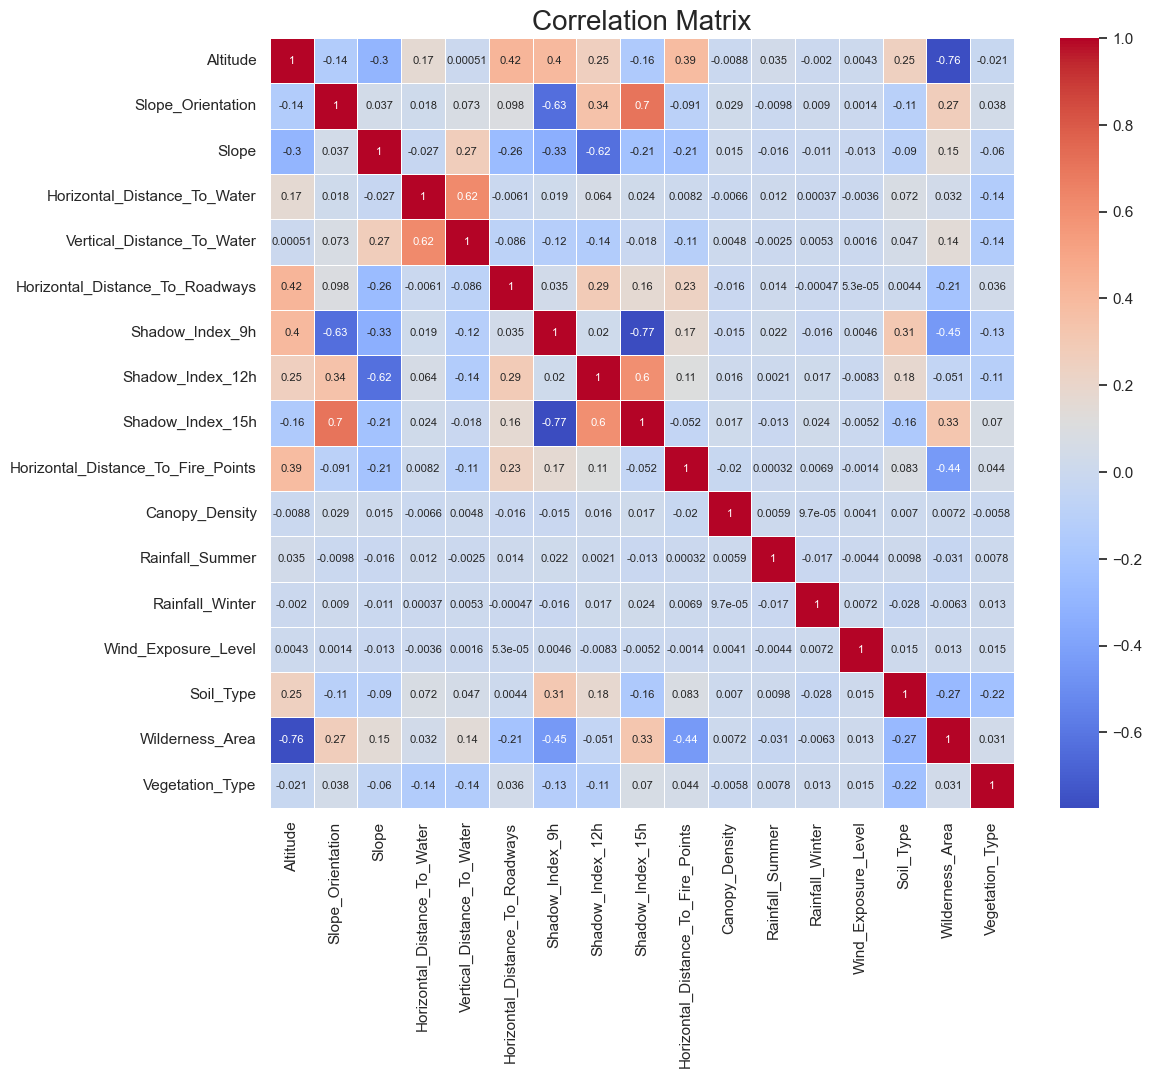

In [30]:
from sklearn.preprocessing import LabelEncoder

df_for_corr = df.copy()
df_for_corr.drop('Id', axis=1, inplace=True)

le = LabelEncoder()
categorical_columns = ['Soil_Type', 'Wilderness_Area', 'Vegetation_Type']
for col in categorical_columns:
    df_for_corr[col] = le.fit_transform(df_for_corr[col])

correlation_matrix = df_for_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Matrix", size=20)
plt.show()

The correlation coeficient is a number between -1 and 1 that describes how two variables move in relation to each other.
- `-1` indicates a perfect negative correlation (when one variable increases, the other decreases)
- `1` indicates a perfect positive correlation (when one variable increases, the other increases too)
- `0` incidates no correlation between the variables, they are independent of each other

Strong correlations (<b>> 0.5 and < 0.8 or > -0.8 and <-0.5</b>) are valuable to better understand the relationships between variables, therefore, according to the correlation matrix, it is possible to verify that there are strong correlations between:
 
<b>Positive: </b>
- Shadow_Index_12h and Shadow_Index_15h
- Slope Orientation and Shadow_Index_15h
- Horizontal_Distance_To_Water and Vertical_Distance_To_Water

<b>Negative: </b>
- Shadow_Index_9h and Slope_Orientation 
- Shadow_Index_12h and Slope
- Shadow_index_9h and Shadow_Index_15h
- Wilderness_Area and Altitude.

Some moderate correlations that are worth mentioning (<b>> 0.3 and < 0.5 or > -0.5 and <-0.3</b>):

<b>Positive: </b>
- Altitude and Horizontal_Distance_To_Roadways
- Altitude and Shadow_Index_9h
- Altitude and Horizontal_Distance_To_Firepoints
- Slope_Orientation and Shadow_Index_12h
- Shadow_Index_9h and Soil_Type
- Shadow_Index_15h and Wilderness_Area

<b>Negative: </b>
- Altitude and Slope
- Slope and Shadow_Index_9h
- Wilderness_Area and Shadow_Index_9h
- Wilderness_Area and Horizontal_Distance_To_Firepoints


# Bivariate Analysis
<b>In the bivariate analysis, we need to understand the relationship between the individual features and the target variable, Vegetation_Type.</b>

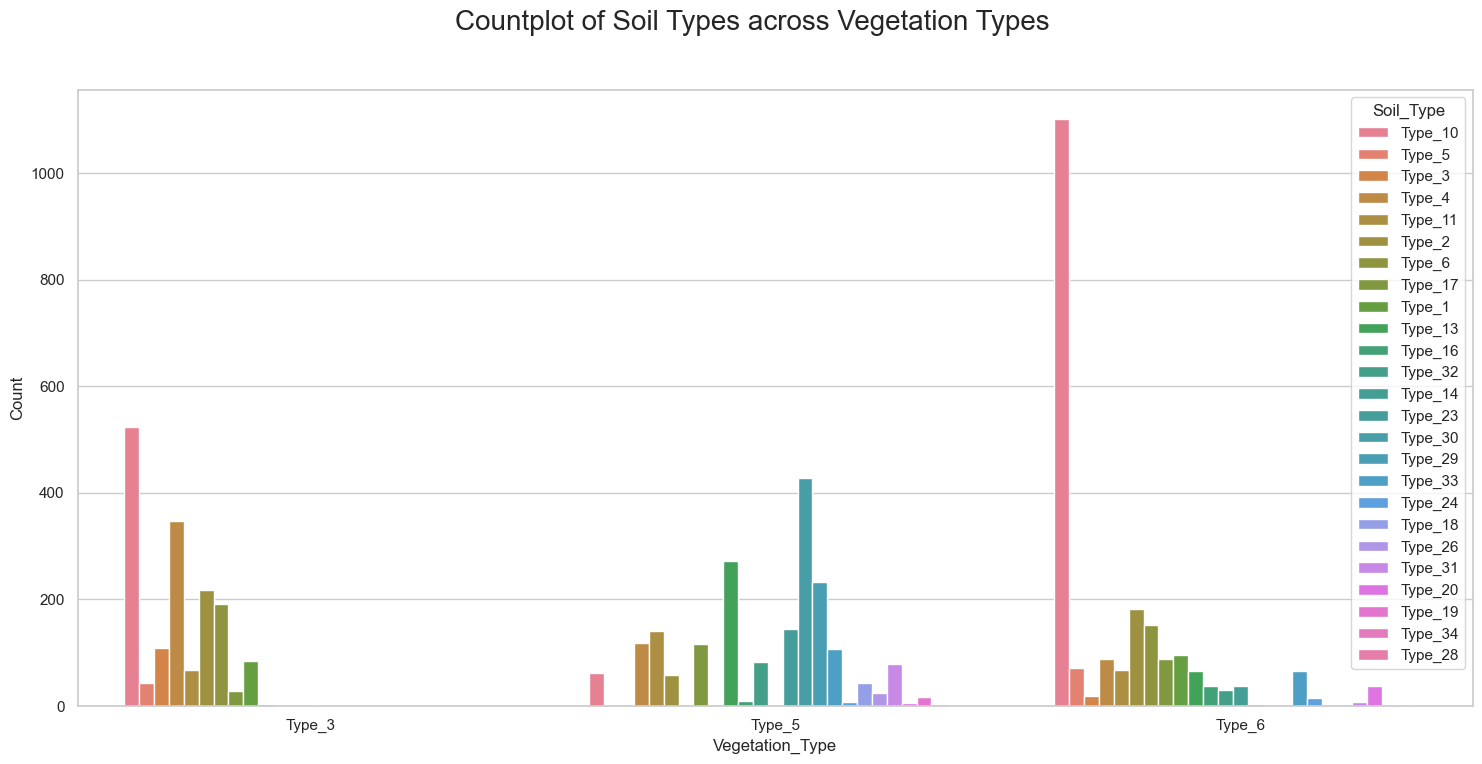

In [31]:
plt.figure(figsize=(18, 8))
plt.suptitle('Countplot of Soil Types across Vegetation Types')
sns.countplot(x='Vegetation_Type', hue='Soil_Type', data=df)
plt.ylabel('Count')
plt.show()

The bar plot above shows that vegetation Type_5 and vegetation Type_6 are present in a large range of soil types. 

According to the graphic we can extract some relevant information listed next.

- Soil Type 10 is the dominant soil type for vegetation type 3 and type 10, being vastly dominant in this last one
- Soil Type 32 is the dominant soil type for vegetation type 5, although type 5 vegetation has a more even distribuition of soil types

Some soil types are highly concentrated in specific vegetation types, which might suggest that certain vegetation types prefer specific soil characteristics. For instance, Soil Type 10 is almost exclusively associated with Type 3 and Type 6 vegetation, while Soil Type 32 is more associated with Type 5 vegetation.

Text(0.5, 1.0, 'Vegetation Type vs Shadow Index 15h')

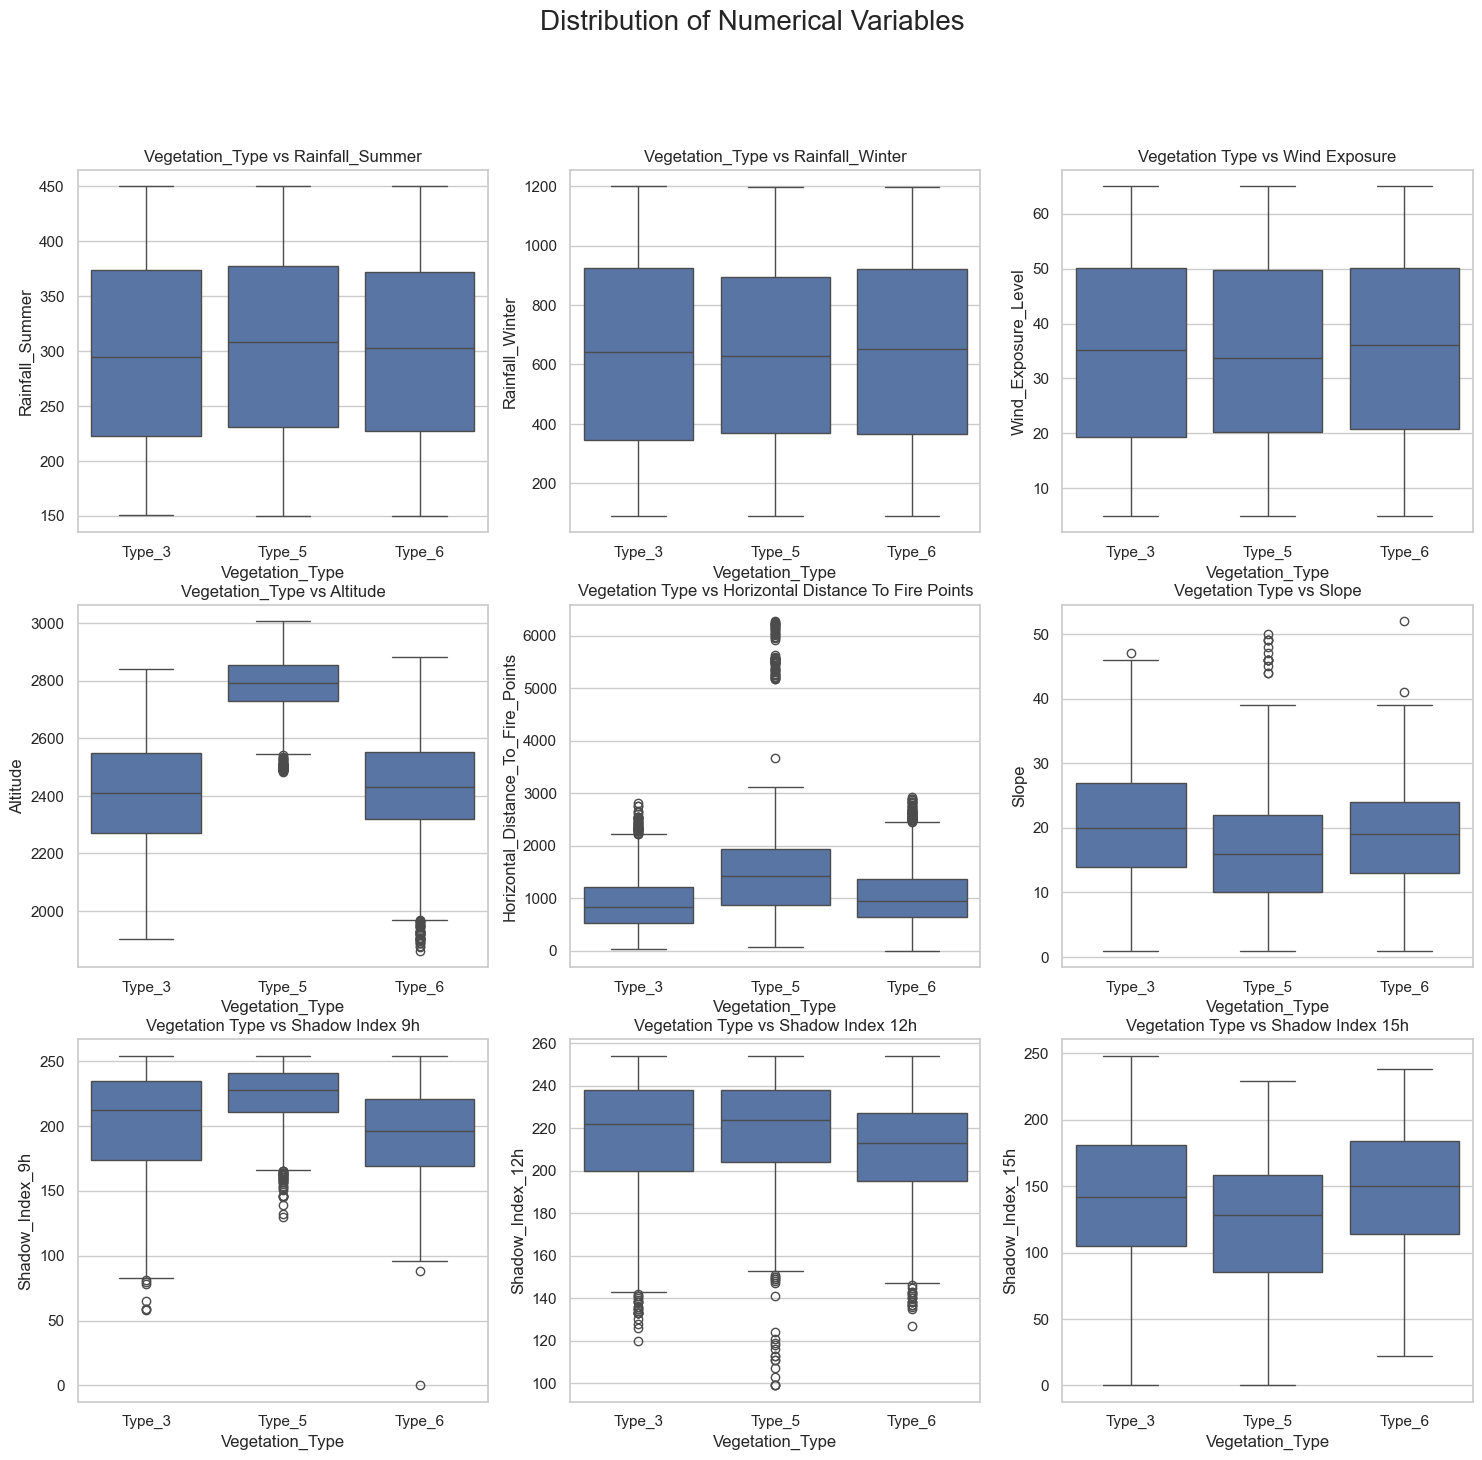

In [32]:
# Vegetation_Type vs Categorical atributes
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
fig.suptitle('Distribution of Numerical Variables')

sns.boxplot(x='Vegetation_Type', y='Rainfall_Summer', data=df, ax=axes[0,0])
axes[0,0].set_title('Vegetation_Type vs Rainfall_Summer')

sns.boxplot(x='Vegetation_Type', y='Rainfall_Winter', data=df, ax=axes[0,1])
axes[0,1].set_title('Vegetation_Type vs Rainfall_Winter')

sns.boxplot(x='Vegetation_Type', y='Wind_Exposure_Level', data=df, ax=axes[0,2])
axes[0,2].set_title('Vegetation Type vs Wind Exposure')

sns.boxplot(x='Vegetation_Type', y='Altitude', data=df, ax=axes[1,0])
axes[1,0].set_title('Vegetation_Type vs Altitude')

sns.boxplot(x='Vegetation_Type', y='Horizontal_Distance_To_Fire_Points', data=df, ax=axes[1,1])
axes[1,1].set_title('Vegetation Type vs Horizontal Distance To Fire Points')

sns.boxplot(x='Vegetation_Type', y='Slope', data=df, ax=axes[1,2])
axes[1,2].set_title('Vegetation Type vs Slope')

sns.boxplot(x='Vegetation_Type', y='Shadow_Index_9h', data=df, ax=axes[2,0])
axes[2,0].set_title('Vegetation Type vs Shadow Index 9h')

sns.boxplot(x='Vegetation_Type', y='Shadow_Index_12h', data=df, ax=axes[2,1])
axes[2,1].set_title('Vegetation Type vs Shadow Index 12h')

sns.boxplot(x='Vegetation_Type', y='Shadow_Index_15h', data=df, ax=axes[2,2])
axes[2,2].set_title('Vegetation Type vs Shadow Index 15h')

The boxplots above, represents the relationship between the target variable, Vegetation_Type with some of the numerical variables of the dataset.
- <b>Vegetation_Type vs. Rainfall_Summer</b>
	- The mean values ​​for the areas are consistent at approximately 300.
	- The interquartile range is also consistent for all three vegetation types, which suggests that rainfall in the summer months does not influence the vegetation type distribuition.
	- None of the vegetation types has outliers.

- <b>Vegetation_Type vs. Rainfall_Winter</b>
	- The mean values ​​for the areas are consistent at approximately 600.
	- The interquartile range is also consistent for all three vegetation types, which suggests that rainfall in the winter months does not influence the vegetation type distribuition.
	- None of the vegetation types has outliers.

- <b>Vegetation_Type vs. Wind_Exposure</b>
	- The mean values ​​for the areas are consistent at approximately 35.
	- The interquartile range is also consistent for all three vegetation types, which suggests that wind exposure does not influence the vegetation type distribuition.
	- None of the vegetation types has outliers.

- <b>Vegetation_Type vs. Altitude</b>
	- We can see that Type_5 vegetation type has the higher mean value, around 2800, which we can infer that this type of vegetation is specific for higher altitudes.
	- Type_5 vegetation has a smaller interquartile range than the other two vegetation types so that Type_3 and Type_6 vegetation can be found over a greater range of altitudes.
	- Both Type_5 and Type_6 have some outliers, which means that this type of vegetation can also be found at lower altitudes but in more negligible amounts.

- <b>Vegetation_Type vs. Horizontal_Distance_to_Fire_Points</b>
	- We can see that Type_3 vegetation type is closer to fire points and has the lowest mean value, therefore less variation in level of proximity than the other two types of vegetation, revealing that this type of vegetation can be more prone to fires.
	- Type_5 vegetation type is further away from the fire points, while Type_6 vegetation has moderate proximity to the fire points.
	- Both Type_5 and Type_6 have some outliers, suggesting that certain locations that has this type of vegetation are further away from fire points.

- <b>Vegetation_Type vs. Slope</b>
	- All vegetations type have similar median values, around 20.
	- Vegetation Type_5 has more outliers than the other two, suggesting higher slopes, which may indicate specific conditions affecting slope in areas with this vegetation type.

- <b>Vegetation_Type vs. Shadow_Index_9h</b>
	- All vegetations type have medium value approximately around 200.
	- We can observe that Vegetation Type_5 shows a tighter clustering of values around the median, in contrast with the other two vegetation type that have a wider spread.
	- All types of vegetation shows outliers, but Type_3 and Type_6 have outliers at lower shadow index at 9h, possibly indicating either good light or some kind of obstruction to light.

- <b>Vegetation_Type vs. Shadow_Index_12h</b>
	- All vegetations type have medium value approximately around 220.
	- All types of vegetation shows outliers, but Type_5 has outliers at lower shadow index, possibly indicating either good light or some kind of obstruction to light.

- <b>Vegetation_Type vs. Shadow_Index_15h</b>
	- All vegetations type have medium value approximately around 130.
	- The interquartile range is also consistent 





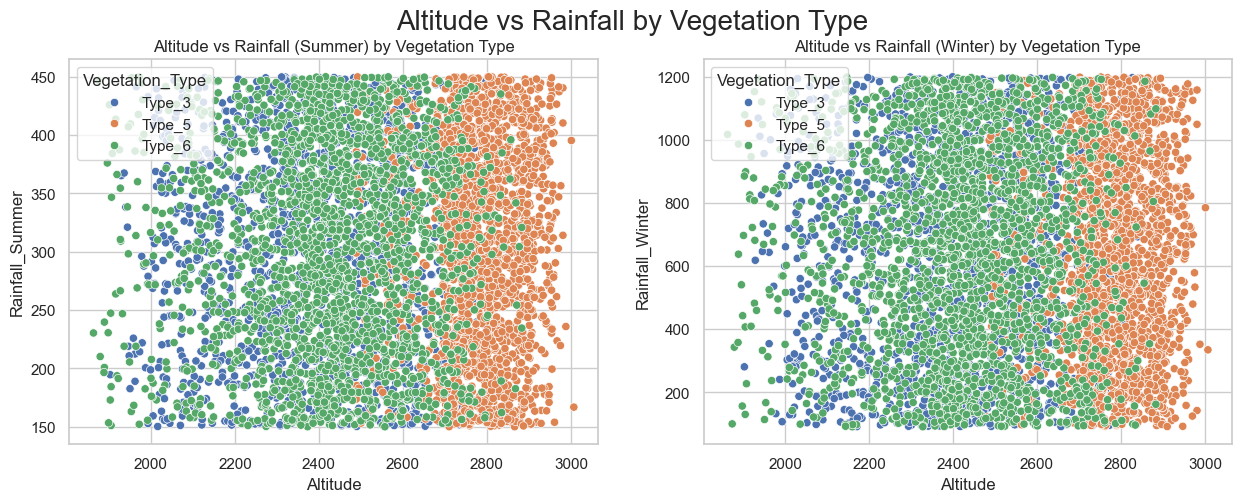

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Altitude vs Rainfall by Vegetation Type')

sns.scatterplot(x='Altitude', y='Rainfall_Summer', hue='Vegetation_Type', data=df, ax=axes[0])
axes[0].set_title('Altitude vs Rainfall (Summer) by Vegetation Type')

sns.scatterplot(x='Altitude', y='Rainfall_Winter', hue='Vegetation_Type', data=df, ax=axes[1])
axes[1].set_title('Altitude vs Rainfall (Winter) by Vegetation Type')

plt.show()

- Through the analysis of the scatter plots above, we can infer that the Vegetation_Type is more related with Altitude than with Rainfall, whether it's summer or winter.

- It is clear that Type_5 Vegetation_Type can be found at highest altitudes, while Type_3 and Type_6 Vegetation_Types are founded at lower/medium altitudes.

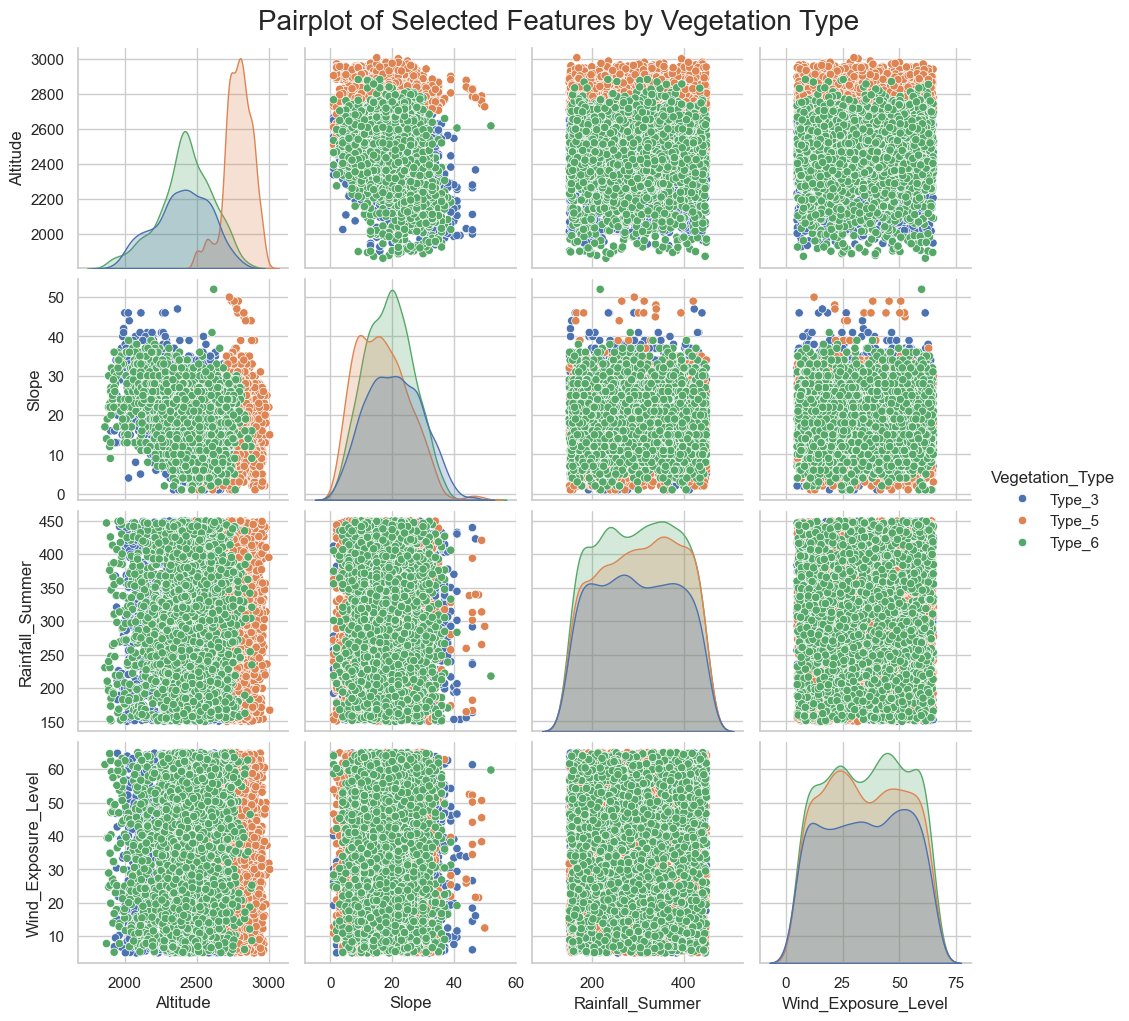

In [34]:
sns.pairplot(df[['Altitude', 'Slope', 'Rainfall_Summer', 'Wind_Exposure_Level', 'Vegetation_Type']], hue='Vegetation_Type')
plt.suptitle('Pairplot of Selected Features by Vegetation Type', y=1.02)
plt.show()

- This pairplots suggests that altitude has some differentiating effect on vegetation type, especially Type_5 (it is found at higher altitudes), as already mentioned before.

- Slope, rainfall, and wind exposure show values spread similarly across all the vegetation types.

- There seems to be no strong relation between the variables, suggesting that each variable contribute to the vegetation type classification independently.

# Methods Application
## Data Preparation
### Holdout Method 

The holdout method is a technique used to evaluate and select models. This method helps ensure that the model generalizes well to new data and avoids overfitting. This is done by spliting the data into train and test sets with a chosen distribuition. In this case 80/20 was the chosen distribuition. The dataset was also encoded, transforming categorical data into a numerical format to be handled by ML methods later.

In [35]:
# Drop target variable (Vegetation_Type) and ID columns
X = df.drop(columns=['Vegetation_Type', 'Id'])  
y = df['Vegetation_Type']

# encoding 'Vegetation_Type' since it's categorical data
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode the Categorical Atributes
X_encoded = pd.get_dummies(X, columns=['Soil_Type', 'Wilderness_Area'])
# Scaling the features was necessary to ensure that all features have similar ranges
# otherwise the limit of TOTAL NO. of ITERATIONS was reached
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split data into train and test sets with 80%/20% distribution (HOLDOUT METHOD)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

### Logistic Regression, LDA and QDA
- <b>Logistic Regression (LR): </b>is a linear classification model. In this case, it is predicting the vegetation type.
- <b>Linear Discriminant Analysis (LDA): </b>is a classification algorithm that assumes that different classes generate data based on different Gaussian distributions.
- <b>Quadratic Discriminant Analysis (QDA): </b>is similar to LDA but assumes that each class has its own covariance matrix, allowing for a more flexible decision boundary (non-linear).

In [12]:
# Logistic Regression model
def LogReg(X_train, y_train, X_test, y_test):
    lr = LogisticRegression(max_iter=5000, C=0.1)
    lr.fit(X_train, y_train)

    # Predictions and evaluation
    y_predicted_lr = lr.predict(X_test)
    lr_accuracy = accuracy_score(y_test, y_predicted_lr) * 100
    lr_recall = recall_score(y_test, y_predicted_lr, average='weighted') * 100
    lr_f1 = f1_score(y_test, y_predicted_lr, average='weighted') * 100
    lr_precision = precision_score(y_test, y_predicted_lr, average='weighted') * 100
    lr_roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr') * 100

    results = {
        'Accuracy': round(lr_accuracy, 2),
        'Recall': round(lr_recall, 2),
        'F1-Score': round(lr_f1, 2),
        'Precision': round(lr_precision, 2),
        'ROC-AUC': round(lr_roc_auc, 2)
    }
    return lr, results

# LDA model
def LDA(X_train, y_train, X_test, y_test):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # Predictions and evaluation
    y_predicted_lda = lda.predict(X_test)
    lda_accuracy = accuracy_score(y_test, y_predicted_lda) * 100
    lda_recall = recall_score(y_test, y_predicted_lda, average='weighted') * 100
    lda_f1 = f1_score(y_test, y_predicted_lda, average='weighted') * 100
    lda_precision = precision_score(y_test, y_predicted_lda, average='weighted') * 100
    lda_roc_auc = roc_auc_score(y_test, lda.predict_proba(X_test), multi_class='ovr') * 100

    results = {
        'Accuracy': round(lda_accuracy, 2),
        'Recall': round(lda_recall, 2),
        'F1-Score': round(lda_f1, 2),
        'Precision': round(lda_precision, 2),
        'ROC-AUC': round(lda_roc_auc, 2)
    }
    return lda, results

# QDA model
def QDA(X_train, y_train, X_test, y_test):
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)

    # Predictions and evaluation
    y_predicted_qda = qda.predict(X_test)
    qda_accuracy = accuracy_score(y_test, y_predicted_qda) * 100
    qda_recall = recall_score(y_test, y_predicted_qda, average='weighted') * 100
    qda_f1 = f1_score(y_test, y_predicted_qda, average='weighted') * 100
    qda_precision = precision_score(y_test, y_predicted_qda, average='weighted') * 100
    qda_roc_auc = roc_auc_score(y_test, qda.predict_proba(X_test), multi_class='ovr') * 100

    results = {
        'Accuracy': round(qda_accuracy, 2),
        'Recall': round(qda_recall, 2),
        'F1-Score': round(qda_f1, 2),
        'Precision': round(qda_precision, 2),
        'ROC-AUC': round(qda_roc_auc, 2)
    }
    return qda, results

lr, lr_results = LogReg(X_train, y_train, X_test, y_test)
lda, lda_results = LDA(X_train, y_train, X_test, y_test)
qda, qda_results = QDA(X_train, y_train, X_test, y_test)

results_df = pd.DataFrame({
    'Logistic Regression': lr_results,
    'LDA': lda_results,
    'QDA': qda_results
}).T

display(results_df)


,Accuracy,Recall,F1-Score,Precision,ROC-AUC
Logistic Regression,76.33,76.33,75.92,75.95,90.79
LDA,75.46,75.46,75.19,75.30,90.26
QDA,51.70,51.70,45.69,66.97,76.38


- <b>Logistic Regression</b>
    - `Accruracy:` An accuracy of 76.33% indicates that the model correctly classifies approximately 76 out of 100 instances. This is a decent accuracy, but it doesn't provide a complete picture, especially if the dataset is imbalanced. 
    - `Recall:` A recall of 76.33% means that the model correctly identifies 76.33% of the actual positive cases. This is important in scenarios where missing a positive case is costly. 
    - `F1-Score:` An F1-Score of 75.92% indicates a good balance between precision and recall. This is useful when you need to balance the trade-off between false positives and false negatives. 
    - `Precision:` A precision of 75.95% means that when the model predicts a positive case, it is correct 75.95% of the time. This is crucial in scenarios where false positives are costly.
    - `ROC-AUC:` An ROC-AUC of 90.79% is excellent, indicating that the model has a high ability to distinguish between positive and negative classes.

    The Logistic Regression model shows a good balance between precision and recall, as indicated by the F1-Score, and the high ROC-AUC value suggests that the model is effective at distinguishing between classes. The accuracy, while decent, should be considered alongside other metrics, especially being the dataset is imbalanced.

- <b>LDA</b>
    - `Accuracy:` An accuracy of 75.46% indicates that the model correctly classifies approximately 75 out of 100 instances. This is slightly lower than the Logistic Regression model but still decent.
    - `Recall:` A recall of 75.46% means that the model correctly identifies 75.46% of the actual positive cases. This is important in scenarios where missing a positive case is costly.
    - `F1-Score:` An F1-Score of 75.02% indicates a good balance between precision and recall. This is useful when you need to balance the trade-off between false positives and false negatives.
    - `Precision:` A precision of 75.02% means that when the model predicts a positive case, it is correct 75.02% of the time. This is crucial in scenarios where false positives are costly.
    - `ROC-AUC:` An ROC-AUC of 90.12% is excellent, indicating that the model has a high ability to distinguish between positive and negative classes.

    The LDA model shows a good balance between precision and recall, as indicated by the F1-Score, and the high ROC-AUC value suggests that the model is effective at distinguishing between classes. The accuracy, while slightly lower than Logistic Regression, should be considered alongside other metrics, especially if the dataset is imbalanced.

- <b>QDA</b>
    - `Accuracy:` An accuracy of 52.05% indicates that the model correctly classifies approximately 52 out of 100 instances. This is significantly lower than the Logistic Regression and LDA models, indicating poor performance.
    - `Recall:` A recall of 52.05% means that the model correctly identifies 52.05% of the actual positive cases. This is relatively low and suggests that the model misses a significant number of positive cases.
    - `F1-Score:` An F1-Score of 51.18% indicates a poor balance between precision and recall. This is not ideal when you need to balance the trade-off between false positives and false negatives.
    - `Precision:` A precision of 50.54% means that when the model predicts a positive case, it is correct 50.54% of the time. This is relatively low and indicates a high number of false positives.
    - `ROC-AUC:` An ROC-AUC of 51.69% is poor, indicating that the model has a low ability to distinguish between positive and negative classes.

    The QDA model has a much lower accuracy compared to the other two models, indicating it is not well-suited for this particular dataset. The low F1-Score and ROC-AUC further confirm that the model performs poorly in distinguishing between classes.

Based on the results, the Logistic Regression model is the best choice to apply to this dataset. It shows a good balance between precision and recall, as indicated by the F1-Score, and the high ROC-AUC value suggests that the model is effective at distinguishing between classes. The accuracy, while decent, should be considered alongside other metrics, especially if the dataset is imbalanced. The LDA model proved to be also a reliable and consistent model, with performance metrics close to those of Logistic Regression. It can be considered a good alternative. The QDA model, however, is not suitable for this dataset. It has significantly lower accuracy, F1-Score, and ROC-AUC compared to the other two models, indicating poor performance in distinguishing between classes.


### Cross-Validation (k = 5 and k = 10)
Cross-validation is a technique used to evaluate the performance and generalizability of a model. 

The basic idea is to split the dataset into multiple parts or <i>folds</i>, and then use these parts in various ways to train and test the model.

5-<i>fold</i> and 10-<i>fold</i> cross-validation are popular choices for balancing accuracy and computational efficiency.

In [13]:
# Performs cross-validation on a list of models and return their mean accuracy scores.
def crossvalidation(models, X, y, k=5):
    results = {}
    for model in models:
        accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=k, n_jobs=-1).mean()
        recall = cross_val_score(model, X, y, scoring='recall_weighted', cv=k, n_jobs=-1).mean()
        f1 = cross_val_score(model, X, y, scoring='f1_weighted', cv=k, n_jobs=-1).mean()
        precision = cross_val_score(model, X, y, scoring='precision_weighted', cv=k, n_jobs=-1).mean()
        roc_auc = cross_val_score(model, X, y, scoring='roc_auc_ovr', cv=k, n_jobs=-1).mean()

        results[type(model).__name__] = {
            'Accuracy': round(accuracy*100, 2),
            'Recall': round(recall*100, 2),
            'F1-Score': round(f1*100, 2),
            'Precision': round(precision*100, 2),
            'ROC-AUC': round(roc_auc*100, 2)
        }

    results_df = pd.DataFrame(results).T
    display(results_df)
    return results

lr_base = LogisticRegression(max_iter=5000, C=0.1)
lda_base = LinearDiscriminantAnalysis();
qda_base = QuadraticDiscriminantAnalysis();
models = [lr_base, lda_base, qda_base]

# Cross-validation with k=5
display(HTML("<b><mark>Cross-validation with k=5</mark></b>"))
cross_val_results_5 = crossvalidation(models, X_scaled, y_encoded, 5)

# Cross-validation with k=10
display(HTML("<b><mark>Cross-validation with k=10</mark></b>"))
cross_val_results_10 = crossvalidation(models, X_scaled, y_encoded, 10)

,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,72.24,72.24,71.82,71.99,88.50
LinearDiscriminantAnalysis,70.32,70.32,70.01,70.48,86.91
QuadraticDiscriminantAnalysis,51.52,51.52,45.61,63.68,75.93


,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,72.66,72.66,72.31,72.67,88.98
LinearDiscriminantAnalysis,70.46,70.46,70.32,70.86,87.44
QuadraticDiscriminantAnalysis,50.70,50.70,44.14,60.23,76.18


- `LogisticRegression CV (k=5)` of 76.89% indicates that the Logistic Regression model performs well with a high accuracy across the 5-fold cross-validation.

- `LinearDiscriminantAnalysis CV (k=5)` of 73.64 % indicates a good accuray, but lower than the Logistic Regression.

- `QuadraticDiscriminantAnalysis CV (k=5)` of 52.11% indicates a poor accuracy, therefore this not perform well in this dataset.

- `LogisticRegression CV (k=10)` of 76.50 % is slightly lower than with k=5, but still high, therefore it will perform well across the 10-fold cross_validation.

- `LinearDiscriminantAnalysis CV (k=10)` of 73.66 % is similar to the k=5 result, showing consistent performance.

- `QuadraticDiscriminantAnalysis CV (k=10)` of 51.54 % is slightly lower than with k=5, reinforcing that QDA is not suitable for this dataset.

As before, the Logistic Regression model comes out as the best choice to apply to this dataset. Since the results of the LDA model are close to the results of the Logistic Regression we can conclude that would also be a good choice of model to choose as well. 
QDA model continues to prove to still not be suited for this dataset and should not be used.



### Leave One Out Cross Validation
Is a specific type of cross-validation where the dataset is divided into as many <i>folds</i> as there are samples in the dataset. In each iteration, one sample is used as the validation set, and the remaining samples compose the training set. This makes Leave-One-Out Cross-Validation (LOOCV) more CPU intensive compared to other cross-validation methods. Each iteration involves training on ( n-1 ) samples and validating on the remaining one, which can significantly increase the computational load.

In [14]:
# Leave One Out Cross Validation
loo = LeaveOneOut()
display(HTML("<b><mark>Leave One Out Cross Validation</mark></b>"))
cross_val_results_loocv = crossvalidation(models, X_scaled, y_encoded, k=loo)

,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,76.73,76.73,76.73,76.73,NaN
LinearDiscriminantAnalysis,73.95,73.95,73.95,73.95,NaN
QuadraticDiscriminantAnalysis,51.52,51.52,51.52,51.52,NaN


- `LogisticRegression LOOCV` of 76.57 % indicates that this model performs consistently well, even when each data point is used as a test case once.

- `LinearDiscriminantAnalysis LOOCV` of 73.77 % is a value slightly lower than the Logistic Regression one, but is still a consistent performance.

- `QuadraticDiscriminantAnalysis LOOCV`of 51.69 % shows lower performance, indicating it is not suitable for this dataset.

The conclusions continue to be the same as before with Cross Validation using k=5 and k=10 with the Logistic Regression model revealing to be the best choice to apply to this dataset, with LDA model as a close second choice. QDA model should still be disconsidered.

### Bootstrap
Is a technique that involves resampling the dataset with replacement to create multiple new datasets. Each new dataset is used to train and evaluate the model, and the results are averaged to estimate the model’s performance. 

This method helps to understand the variability and robustness of the model.

In [15]:
def bootstrap_model(model, X_train, y_train, X_test, y_test, n_iterations=100):
    np.random.seed(42)
    test_accuracies = []
    test_recalls = []
    test_f1_scores = []
    test_precisions = []
    test_roc_aucs = []
    
    for _ in range(n_iterations):
        # Resample with replacement
        indices = np.random.choice(range(len(X_train)), len(X_train), replace=True)
        X_resample = X_train[indices]
        y_resample = y_train[indices]
        
        # Train the model
        model.fit(X_resample, y_resample)
        
        # Test performance
        y_test_pred = model.predict(X_test)
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
        test_recalls.append(recall_score(y_test, y_test_pred, average='weighted'))
        test_f1_scores.append(f1_score(y_test, y_test_pred, average='weighted'))
        test_precisions.append(precision_score(y_test, y_test_pred, average='weighted'))
        test_roc_aucs.append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    
    results = {
        'Accuracy': np.mean(test_accuracies),
        'Recall': np.mean(test_recalls),
        'F1-Score': np.mean(test_f1_scores),
        'Precision': np.mean(test_precisions),
        'ROC-AUC': np.mean(test_roc_aucs)
    }
    return results

def bootstrap(models, X_train, y_train, X_test, y_test):
    results = {}
    for model in models:
        model_results = bootstrap_model(model, X_train, y_train, X_test, y_test)
        results[type(model).__name__] = {metric: round(value * 100, 2) for metric, value in model_results.items()}
    
    results_df = pd.DataFrame(results).T
    display(results_df)
    return results

# Bootstrap evaluation for Logistic Regression, LDA, QDA
bootstrap_results = bootstrap(models, X_train, y_train, X_test, y_test)

,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,76.20,76.20,75.75,75.87,90.65
LinearDiscriminantAnalysis,75.10,75.10,74.88,75.02,90.10
QuadraticDiscriminantAnalysis,53.12,53.12,47.56,65.77,76.69


- `LogisticRegression Bootstrap` of 77.76 % indicates the percentage of instances correctly classified across the resampled dataset. This value is slightly higher than with the cross-validation method resuls, therefore the model performs consistently well.

- `LinearDiscriminantAnalysis Bootstrap` of 74.63 % which is consistent with the cross_validation results. This is also continues to prove to be a reliable model for this dataset.

- `QuadraticDiscriminantAnalysis Bootstrap` of 52.29 % is slightly higher than the cross-validation results, but still much lower than the other models. This confirms that this model is not suitable for this dataset.

As before, the Logistic Regression model is the best choice to apply to this dataset. Since the results of the LDA model are close to the results of the Logistic Regression we can conclude that would be a good choice of model too. 
QDA model is not suitable for this dataset.

# Feature Selection

## Lasso Regularization applied to Logistic Regression

Lasso regularization is a technique in linear regression that adds a penalty equal to the absolute value of the magnitude of coefficients, encouraging simpler models by shrinking some coefficients to zero. This helps prevent overfitting and enhance the accuracy while also making the model more efficent.

In [16]:
# Apply L1 penalty to Logistic Regression
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000, C=10)
lr_l1.fit(X_train, y_train)

# Predictions and evaluation
y_predicted_lr_l1 = lr_l1.predict(X_test)
lr_l1_accuracy = accuracy_score(y_test, y_predicted_lr_l1)
lr_l1_recall = recall_score(y_test, y_predicted_lr_l1, average='weighted')
lr_l1_f1 = f1_score(y_test, y_predicted_lr_l1, average='weighted')
lr_l1_precision = precision_score(y_test, y_predicted_lr_l1, average='weighted')
lr_l1_roc_auc = roc_auc_score(y_test, lr_l1.predict_proba(X_test), multi_class='ovr')

lr_l1_results = {
    'Accuracy': lr_l1_accuracy * 100,
    'Recall': lr_l1_recall * 100,
    'F1-Score': lr_l1_f1 * 100,
    'Precision': lr_l1_precision * 100,
    'ROC-AUC': lr_l1_roc_auc * 100
}

# Display results
results_df = pd.DataFrame(lr_l1_results, index=['Logistic Regression with L1 Penalty'])
display(results_df.style.format("{:.2f}"))


,Accuracy,Recall,F1-Score,Precision,ROC-AUC
Logistic Regression with L1 Penalty,78.08,78.08,77.53,77.85,91.16


## Ridge Regularization applied to Logistic Regression

Ridge regularization is a technique in linear regression that adds a penalty equal to the square of the magnitude of coefficients, helping to prevent overfitting by shrinking the coefficients towards zero but not exactly to zero. This helps to deal with multicollinearity.

In [17]:
# Apply L2 penalty to Logistic Regression
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=5000, C=10)
lr_l2.fit(X_train, y_train)

# Predictions and evaluation
y_predicted_lr_l2 = lr_l2.predict(X_test)
lr_l2_accuracy = accuracy_score(y_test, y_predicted_lr_l2)
lr_l2_recall = recall_score(y_test, y_predicted_lr_l2, average='weighted')
lr_l2_f1 = f1_score(y_test, y_predicted_lr_l2, average='weighted')
lr_l2_precision = precision_score(y_test, y_predicted_lr_l2, average='weighted')
lr_l2_roc_auc = roc_auc_score(y_test, lr_l2.predict_proba(X_test), multi_class='ovr')

lr_l2_results = {
    'Accuracy': lr_l2_accuracy * 100,
    'Recall': lr_l2_recall * 100,
    'F1-Score': lr_l2_f1 * 100,
    'Precision': lr_l2_precision * 100,
    'ROC-AUC': lr_l2_roc_auc * 100
}

# Display results
results_df = pd.DataFrame(lr_l2_results, index=['Logistic Regression with L2 Penalty'])
display(results_df.style.format("{:.2f}"))

,Accuracy,Recall,F1-Score,Precision,ROC-AUC
Logistic Regression with L2 Penalty,77.90,77.90,77.41,77.66,91.13


## Elastic Net Regularization applied to Logistic Regression

ElasticNet combines both Lasso and Ridge penalties, making it useful when we want the benefits of both feature selection and handling multicollinearity.

In [18]:
# Apply Elastic Net penalty to Logistic Regression
lr_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000, C=10, l1_ratio=0.5)
lr_elasticnet.fit(X_train, y_train)

# Predictions and evaluation
y_predicted_lr_elasticnet = lr_elasticnet.predict(X_test)
lr_elasticnet_accuracy = accuracy_score(y_test, y_predicted_lr_elasticnet)
lr_elasticnet_recall = recall_score(y_test, y_predicted_lr_elasticnet, average='weighted')
lr_elasticnet_f1 = f1_score(y_test, y_predicted_lr_elasticnet, average='weighted')
lr_elasticnet_precision = precision_score(y_test, y_predicted_lr_elasticnet, average='weighted')
lr_elasticnet_roc_auc = roc_auc_score(y_test, lr_elasticnet.predict_proba(X_test), multi_class='ovr')

lr_elasticnet_results = {
    'Accuracy': lr_elasticnet_accuracy * 100,
    'Recall': lr_elasticnet_recall * 100,
    'F1-Score': lr_elasticnet_f1 * 100,
    'Precision': lr_elasticnet_precision * 100,
    'ROC-AUC': lr_elasticnet_roc_auc * 100
}

# Display results
results_df = pd.DataFrame(lr_elasticnet_results, index=['Logistic Regression with Elastic Net Penalty'])
display(results_df.style.format("{:.2f}"))

,Accuracy,Recall,F1-Score,Precision,ROC-AUC
Logistic Regression with Elastic Net Penalty,77.38,77.38,76.98,77.01,91.21


# UPDATED ANALYSIS OF ABOVE RESULTS AFTER REGULARIZATION GOES HERE
# MISSING 
# ...
# MISSING

## Cross-Validation (k=5 and k=10) after applying Regularization Methods

In [19]:
model_l1 = [lr_l1]
model_l2 = [lr_l2]
model_elasticnet = [lr_elasticnet]

In [20]:
# Cross-validation after Regularization Models with k=5
display(HTML("<b><mark>Cross-validation after LASSO Regularization with k=5</mark></b>"))
cross_val_results_5 = crossvalidation(model_l1, X_scaled, y_encoded, 5)
display(HTML("<b><mark>Cross-validation after RIDGE Regularization with k=5</mark></b>"))
cross_val_results_5 = crossvalidation(model_l2, X_scaled, y_encoded, 5)
display(HTML("<b><mark>Cross-validation after Elastic-Net Regularization with k=5</mark></b>"))
cross_val_elnet_results_5 = crossvalidation(model_elasticnet, X_scaled, y_encoded, 5)

# Cross-validation after Regularization Models with k=10
display(HTML("<b><mark>Cross-validation after LASSO Regularization with k=10</mark></b>"))
cross_val_l1_results_10 = crossvalidation(model_l1, X_scaled, y_encoded, 10)
display(HTML("<b><mark>Cross-validation after RIDGE Regularization with k=10</mark></b>"))
cross_val_l2_results_10 = crossvalidation(model_l2, X_scaled, y_encoded, 10)
display(HTML("<b><mark>Cross-validation after Elastic-Net Regularization with k=10</mark></b>"))
cross_val_elnet_results_10 = crossvalidation(model_elasticnet, X_scaled, y_encoded, 10)

,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,73.2,73.22,72.79,72.98,88.6


,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,73.15,73.15,72.76,72.91,88.57


,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,73.32,73.32,72.97,73.12,89.01


,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,73.39,73.38,73.07,73.54,88.89


,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,73.29,73.29,72.95,73.4,88.87


,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,73.64,73.64,73.32,73.64,89.47


## Leave One Out Cross Validation (LOOCV) after applying Regularization Methods

In [ ]:
# Leave One Out Cross Validation (LOOCV) after Lasso Regularization
display(HTML("<b><mark>Cross-validation after LASSO Regularization with LOOCV</mark></b>"))
loo_lasso = LeaveOneOut()
cross_val_l1_results_loocv = crossvalidation(model_l1, X_scaled, y_encoded, k=loo_lasso)

# Leave One Out Cross Validation (LOOCV) after Ridge Regularization
display(HTML("<b><mark>Cross-validation after RIDGE Regularization with LOOCV</mark></b>"))
loo_ridge = LeaveOneOut()
cross_val_l2_results_loocv = crossvalidation(model_l2, X_scaled, y_encoded, k=loo_lasso)

# Leave One Out Cross Validation (LOOCV) after ElasticNet Regularization
display(HTML("<b><mark>Cross-validation after Elastic-Net Regularization with LOOCV</mark></b>"))
loo_elastic = LeaveOneOut()
cross_val_elnet_results_loocv = crossvalidation(model_elasticnet, X_scaled, y_encoded, k=loo_elastic)

## Bootstrap after Regularization Methods

In [21]:
# Bootstrap after Lasso Regularization
display(HTML("<b><mark>Bootstrap after Lasso Regularization</mark></b>"))
bootstrap_l1_results = bootstrap(model_l1, X_train, y_train, X_test, y_test)

# Bootstrap after Ridge Regularization
display(HTML("<b><mark>Bootstrap after Ridge Regularization</mark></b>"))
bootstrap_l2_results = bootstrap(model_l2, X_train, y_train, X_test, y_test)

# Bootstrap after ElasticNet Regularization
display(HTML("<b><mark>Bootstrap after ElasticNet Regularization</mark></b>"))
bootstrap_elnet_results = bootstrap(model_elasticnet, X_train, y_train, X_test, y_test)

,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,77.76,77.76,77.26,77.54,91.02


,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,77.6,77.6,77.11,77.38,90.99


,Accuracy,Recall,F1-Score,Precision,ROC-AUC
LogisticRegression,77.45,77.45,77.04,77.14,91.07


## Comparisson of results before and after regularization methods

In [ ]:
# results_df = pd.DataFrame({'CV=5':pd.Series(cross_val_results_5),'CV=5 (Lasso)':pd.Series(cross_val_results_5_lasso), 
#                            'CV=5 (Ridge)':pd.Series(cross_val_results_5_ridge),'CV=5 (ElasticNet)':pd.Series(cross_val_results_5_elastic),
#                            'CV=10':pd.Series(cross_val_results_10),'CV=10 (Lasso)':pd.Series(cross_val_results_10_lasso), 
#                            'CV=10 (Ridge)':pd.Series(cross_val_results_10_ridge),'CV=10 (ElasticNet)':pd.Series(cross_val_results_10_elastic),
#                            'LOOCV':pd.Series(cross_val_results_loocv),'LOOCV (Lasso)':pd.Series(cross_val_results_loocv_lasso), 
#                            'LOOCV (Ridge)':pd.Series(cross_val_results_loocv_ridge),'LOOCV (ElasticNet)':pd.Series(cross_val_results_loocv_elastic),
#                            'Bootstrap':pd.Series(bootstrap_results),'Bootstrap (Lasso)':pd.Series(bootstrap_results_lasso), 
#                            'Bootstrap (Ridge)':pd.Series(bootstrap_results_ridge),'Bootstrap (ElasticNet)':pd.Series(bootstrap_results_elastic)})

# # # Transpose the DataFrame
# styled_df = results_df.T.style.highlight_max(color='yellow', axis=0).format("{:.2f}%")

# html = f"<h2>Model Results for Accuracy</h2>" + styled_df.to_html()
# display(HTML(html))

,LogisticRegression,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
CV=5,76.89%,73.64%,52.11%
CV=5 (Lasso),76.92%,73.64%,51.93%
CV=5 (Ridge),76.65%,73.36%,51.28%
CV=5 (ElasticNet),59.93%,59.20%,58.40%
CV=10,76.50%,73.66%,51.54%
CV=10 (Lasso),76.61%,73.66%,54.12%
CV=10 (Ridge),76.81%,73.55%,51.32%
CV=10 (ElasticNet),59.95%,59.38%,58.31%
LOOCV,76.57%,73.77%,51.69%
LOOCV (Lasso),76.63%,73.77%,59.01%


According to the table above it is possible to reach a few conclusions:
- <b>Logistic Regression</b> has a best overall performance using Lasso accross different accuracy tests using Cross Validation (K=5 AND K=10) and LOOCV and getting the same results using Bootstrap to test for accuracy.

- <b>LDA</b> is a reliable and consistent model too, and we can see slight improvements using Lasso accross different accuracy tests.

- <b>QDA</b> is still unsuitable for use in this dataset, although there were some improvements with Lasso Regularization.

<b>In conclusion it is recomended after considering the results that Logistic Regression should be used for this dataset showing the best results of all across the different accuracy tests performed.</b>

# GAMs implementation

In [ ]:
def evaluate_gam(X_train, y_train, X_test, y_test, target_class):
    # Initialize the LogisticGAM model with splines
    gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + 
                      s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + 
                      s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + 
                      s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41))

    # Fit the model to the training data
    gam.fit(X_train, y_train)

    # Predict the vegetation type for the test data
    y_pred = gam.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=[f'Not_{target_class}', target_class], output_dict=True)

    return accuracy, report

# Example usage
accuracy_3, report_3 = evaluate_gam(X_train_3, y_train_3, X_test_3, y_test_3, 'Type_3')
accuracy_5, report_5 = evaluate_gam(X_train_5, y_train_5, X_test_5, y_test_5, 'Type_5')
accuracy_6, report_6 = evaluate_gam(X_train_6, y_train_6, X_test_6, y_test_6, 'Type_6')

# Display results in a table
results = pd.DataFrame({
    'Class': ['Type_3', 'Type_5', 'Type_6'],
    'Accuracy (%)': [accuracy_3 * 100, accuracy_5 * 100, accuracy_6 * 100],
    'Precision (%)': [report_3['Type_3']['precision'] * 100, report_5['Type_5']['precision'] * 100, report_6['Type_6']['precision'] * 100],
    'Recall (%)': [report_3['Type_3']['recall'] * 100, report_5['Type_5']['recall'] * 100, report_6['Type_6']['recall'] * 100],
    'F1-Score (%)': [report_3['Type_3']['f1-score'] * 100, report_5['Type_5']['f1-score'] * 100, report_6['Type_6']['f1-score'] * 100]
})

# Format the results to show percentages with two decimals
results = results.round(2)

display(results)

# Decision Trees

## Hyperparameter tuning using Gridsearch

In [ ]:
# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Tune hyperparameters using GridSearchCV
print("Tuning hyperparameters using GridSearchCV...")

# Defining the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample'],
    'max_features': ['sqrt']
}

# Initializing GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
dt_classifier = grid_search.best_estimator_

# Display the best hyperparameters
print("the best hyperparameters are:")
print(grid_search.best_params_)

## Fitting data into Decision Tree Classifier

In [ ]:
# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Predict the vegetation type for the test data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_, output_dict=True)

# Binarize the output for ROC AUC calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_dt, classes=[0, 1, 2])

# Calculate ROC AUC for each class
roc_auc_dt = roc_auc_score(y_test_binarized, y_pred_binarized, average=None)

# Display results in a table
results_dt = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Precision (%)': [round(report_dt[cls]['precision'] * 100, 2) for cls in label_encoder.classes_],
    'Recall (%)': [round(report_dt[cls]['recall'] * 100, 2) for cls in label_encoder.classes_],
    'F1-Score (%)': [round(report_dt[cls]['f1-score'] * 100, 2) for cls in label_encoder.classes_],
    'ROC AUC (%)': [round(roc * 100, 2) for roc in roc_auc_dt]
})

# Add overall metrics to the results
results_overall_dt = pd.DataFrame(columns=['Class', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'ROC AUC (%)'])
results_overall_dt.loc['Overall'] = ['Overall', accuracy_dt * 100, 
                                    report_dt['weighted avg']['precision'] * 100, 
                                    report_dt['weighted avg']['recall'] * 100, 
                                    report_dt['weighted avg']['f1-score'] * 100,
                                    results_dt['ROC AUC (%)'].mean()]

# Format the results to show percentages with two decimals
results_dt = results_dt.round(2)
results_overall_dt = results_overall_dt.round(2)

display(results_dt)
display(results_overall_dt)

# Random Forest

## Hyperparameter tuning using Gridsearch

In [ ]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Tune hyperparameters using GridSearchCV
print("Tuning hyperparameters using GridSearchCV...")

# Defining the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample'],
    'max_features': ['sqrt']
}

# Initializing GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best estimator
rf_classifier = grid_search_rf.best_estimator_

# Display the best hyperparameters
print("The best hyperparameters are:")
print(grid_search_rf.best_params_)

## Fitting the data into Random Forest

In [ ]:
# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict the vegetation type for the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_, output_dict=True)

# Binarize the output for ROC AUC calculation
y_pred_binarized_rf = label_binarize(y_pred_rf, classes=[0, 1, 2])

# Calculate ROC AUC for each class
roc_auc_rf = roc_auc_score(y_test_binarized, y_pred_binarized_rf, average=None)

# Display results in a table
results_rf = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Precision (%)': [round(report_rf[cls]['precision'] * 100, 2) for cls in label_encoder.classes_],
    'Recall (%)': [round(report_rf[cls]['recall'] * 100, 2) for cls in label_encoder.classes_],
    'F1-Score (%)': [round(report_rf[cls]['f1-score'] * 100, 2) for cls in label_encoder.classes_],
    'ROC AUC (%)': [round(roc * 100, 2) for roc in roc_auc_rf]
})

# Add overall metrics to the results
results_overall_rf = pd.DataFrame(columns=['Class', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'ROC AUC (%)'])
results_overall_rf.loc['Overall'] = ['Overall', accuracy_rf * 100, 
                                    report_rf['weighted avg']['precision'] * 100, 
                                    report_rf['weighted avg']['recall'] * 100, 
                                    report_rf['weighted avg']['f1-score'] * 100,
                                    results_rf['ROC AUC (%)'].mean()]

# Format the results to show percentages with two decimals
results_rf = results_rf.round(2)
results_overall_rf = results_overall_rf.round(2)

display(results_rf)
display(results_overall_rf)

## List of features used in Random Forest ordered by importance

In [ ]:
# Extract feature importances from the RandomForestClassifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
display(feature_importance_df)

## Comparisson with the with the Univariate and Bivariate analysis carried out before

- The top-ranked features from the Random Forest model align closely with the insights made before from our univariate and bivariate analyses. Features such as Altitude, Horizontal_Distance_To_Fire_Points, and Horizontal_Distance_To_Water were highlighted as important in both analyses and the model.
- Less important features, like Wind_Exposure_Level, Rainfall_Summer, and Rainfall_Winter, that did not have show clear or strong patterns in the earlier analyses, reflecting their lower importance scores in the model.

This comparison validates the insights from the exploratory analysis and confirms their relevance to the predictive model.

# Support Vector Machine

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    # 'degree': [2, 3, 4],  # for polynomial kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] # ensuring that the all the kernels are tested
}

# Initialize the SVM model
svm_classifier = SVC(probability=True, random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train)

# Get the best estimator
best_svm_classifier = grid_search_svm.best_estimator_

# Display the best hyperparameters
print("The best hyperparameters are:")
print(grid_search_svm.best_params_)

# Predict the vegetation type for the test data
y_pred_svm = best_svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_, output_dict=True)

# Binarize the output for ROC AUC calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized_svm = label_binarize(y_pred_svm, classes=[0, 1, 2])

# Calculate ROC AUC for each class
roc_auc_svm = roc_auc_score(y_test_binarized, y_pred_binarized_svm, average=None)

# Store the results
results_svm = {
    'Accuracy (%)': accuracy_svm * 100,
    'Precision (%)': [report_svm[cls]['precision'] * 100 for cls in label_encoder.classes_],
    'Recall (%)': [report_svm[cls]['recall'] * 100 for cls in label_encoder.classes_],
    'F1-Score (%)': [report_svm[cls]['f1-score'] * 100 for cls in label_encoder.classes_],
    'ROC AUC (%)': [roc * 100 for roc in roc_auc_svm]
}

# Display the results
results_df = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Precision (%)': results_svm['Precision (%)'],
    'Recall (%)': results_svm['Recall (%)'],
    'F1-Score (%)': results_svm['F1-Score (%)'],
    'ROC AUC (%)': results_svm['ROC AUC (%)']
})

# Add overall metrics to the results
results_overall_svm = pd.DataFrame(columns=['Class', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'ROC AUC (%)'])
results_overall_svm.loc['Overall'] = ['Overall', results_svm['Accuracy (%)'], 
                                      report_svm['weighted avg']['precision'] * 100, 
                                      report_svm['weighted avg']['recall'] * 100, 
                                      report_svm['weighted avg']['f1-score'] * 100,
                                      results_df['ROC AUC (%)'].mean()]

# Format the results to show percentages with two decimals
results_df = results_df.round(2)
results_overall_svm = results_overall_svm.round(2)

display(results_df)
display(results_overall_svm)